<a href="https://colab.research.google.com/github/keymemory/Machine_Learning_Second/blob/main/ML2_day5_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import random

# BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) ** 2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

# 출력 파일 준비하기
fp = open("bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\r\n")

# 무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(20000):
    h = random.randint(120,200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
fp.close()

In [ ]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

# 키와 몸무게 데이터 읽어 들이기 --- (※1)
# pandas를 사용해 CSV 파일을 읽어들인다. pandas를 이용하면 배열 데이터를 쉽게 다룰 수 # # 있다.
tbl = pd.read_csv("bmi.csv")

# 칼럼(열)을 자르고 정규화하기 --- (※2)
# CSV 파일의 첫 로우(헤더 로우)에 적힌 이름을 기반으로 필요한 컬럼을 추출한다.
# 각 칼럼을 0부터 1의 범위로 정규화하고 몸무게와 키가 적힌 칼럼을 변수 w에 넣고 
# thin/normal/fat 레이블 칼럼을 변수 label에 넣는다.
label = tbl["label"]
w = tbl["weight"] / 100 # 최대 100kg라고 가정
h = tbl["height"] / 200 # 최대 200cm라고 가정
wh = pd.concat([w, h], axis=1)

# 학습 전용 데이터와 테스트 전용 데이터로 나누기 --- (※3)
data_train, data_test, label_train, label_test = \
    train_test_split(wh, label)

# 데이터 학습하기 --- (※4)
# 학습 전용 데이터를 사용해 학습시킨다.
clf = svm.SVC()
clf.fit(data_train, label_train)

# 데이터 예측하기 --- (※5)
predict = clf.predict(data_test)

# 결과 테스트(검증)하기 --- (※6)
ac_score = metrics.accuracy_score(label_test, predict)
cl_report = metrics.classification_report(label_test, predict)
print("정답률 =", ac_score)
print("리포트 =\n", cl_report)

정답률 = 0.9966
리포트 =
               precision    recall  f1-score   support

         fat       1.00      0.99      1.00      1926
      normal       0.99      1.00      0.99      1431
        thin       1.00      1.00      1.00      1643

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



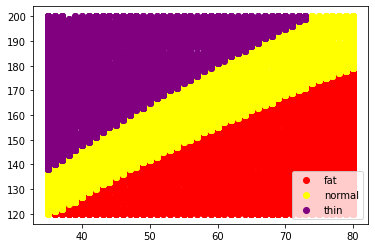

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Pandas로 CSV 파일 읽어 들이기
tbl = pd.read_csv("bmi.csv", index_col=2)

# 그래프 그리기 시작
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯 전용 - 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color):
    b = tbl.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)
scatter("fat",    "red")
scatter("normal", "yellow")
scatter("thin",   "purple")
ax.legend() 
plt.savefig("bmi-test.png")
# plt.show()